In [1]:
df_2 = pd.read_csv('./final_movie_Rev3.csv',thousands=',')
df_2.drop(index=0, axis=0, inplace=True)
df_2.rename(columns={'영화명':'Movie', '배급사':'Distributor', '개봉일':'Release_Date', 
           '전국':'Screen', '전국.1':'Sales', '전국.2':'Audience', '장르':'Genre', '등급':'AgeRate'}, inplace=True)

In [2]:
df_2['Audience'] = df_2['Audience'].str.replace(',','')
df_2['Screen'] = df_2['Screen'].str.replace(',','')
df_2['Sales'] = df_2['Sales'].str.replace(',','')
df_2['Audience'] = df_2['Audience'].astype('int')
df_2['Screen'] = df_2['Screen'].astype('int')
df_2['Sales'] = df_2['Sales'].astype('int64')

In [3]:
# 관객수,매출은 모두 unit: 1,000,000 이다.
df_2['Audience'] = df_2['Audience']/1000000
df_2['Sales'] = df_2['Sales']/1000000
df_2.reset_index(drop=True,inplace=True)

In [4]:
# 'Movie' 나중에 넣기!
df_2.drop(['Sales'],axis=1, inplace=True)

In [5]:
df_2['Year'] = pd.DatetimeIndex(df_2['Release_Date']).year
df_2['Month'] = pd.DatetimeIndex(df_2['Release_Date']).month
df_2.drop(columns=['Release_Date'], inplace=True)
df_2['Season'] = [(month%12 + 3)//3 for month in df_2['Month']]

In [6]:
# 원핫인코딩
df_2 = pd.concat([df_2, pd.get_dummies(df_2['AgeRate'], prefix='rate')], axis=1)
df_2.drop(['AgeRate'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Genre'], prefix='genre')], axis=1)
df_2.drop(['Genre'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Season'], prefix='season')], axis=1)
df_2.drop(['Season'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Year'], prefix='year')], axis=1)
df_2.drop(['Year'], axis=1, inplace=True)
df_2 = pd.concat([df_2, pd.get_dummies(df_2['Month'], prefix='month')], axis=1)
df_2.drop(['Month'], axis=1, inplace=True)

In [7]:
distributor_df = df_2['Distributor'].value_counts().reset_index()[:5]
distributor_df['index']

0              씨제이이앤엠(주)
1          롯데쇼핑㈜롯데엔터테인먼트
2    (주)넥스트엔터테인먼트월드(NEW)
3                 (주)쇼박스
4              씨제이엔터테인먼트
Name: index, dtype: object

In [8]:
CJEnM = df_2[df_2['Distributor'] == '씨제이이앤엠(주)']
CJEnM['CJEnM'] = 1
LotteShop = df_2[df_2['Distributor'] == '롯데쇼핑㈜롯데엔터테인먼트']
LotteShop['LotteShop'] = 1
Next = df_2[df_2['Distributor'] == '(주)넥스트엔터테인먼트월드(NEW)']
Next['Next'] = 1
ShowBox = df_2[df_2['Distributor'] == '(주)쇼박스']
ShowBox['ShowBox'] = 1
CJEnt = df_2[df_2['Distributor'] == '씨제이엔터테인먼트']
CJEnt['CJEnt'] = 1
CJEnM = CJEnM[['Movie', 'CJEnM']]
LotteShop = LotteShop[['Movie', 'LotteShop']]
Next = Next[['Movie', 'Next']]
ShowBox = ShowBox[['Movie', 'ShowBox']]
CJEnt = CJEnt[['Movie', 'CJEnt']] 
df_2 = pd.merge(df_2, CJEnM, on="Movie", how='left') # 58 columns
df_2 = pd.merge(df_2, LotteShop, on="Movie", how='left')
df_2 = pd.merge(df_2, Next, on="Movie", how='left')
df_2 = pd.merge(df_2, ShowBox, on="Movie", how='left')
df_2 = pd.merge(df_2, CJEnt, on="Movie", how='left')
df_2 = df_2.fillna(0)

In [9]:
# Sales는 범죄,사극이 상관계수가 높았다. 
corr_matrix = df_2.corr()
corr_matrix['Audience'].sort_values(ascending=False)

Audience          1.000000
Screen            0.673182
CJEnM             0.240444
ShowBox           0.192342
genre_사극          0.159465
genre_액션          0.154869
month_7           0.149556
genre_판타지         0.127850
genre_어드벤처        0.127260
season_3          0.124061
rate_15세이상관람가     0.113414
month_8           0.090482
genre_범죄          0.089934
rate_12세이상관람가     0.084539
genre_서부극(웨스턴)    0.078287
month_12          0.076271
year_2013         0.066636
Next              0.066216
season_1          0.057241
genre_SF          0.035524
year_2017         0.034500
CJEnt             0.031608
year_2012         0.028917
month_9           0.028118
month_1           0.028088
genre_전쟁          0.025019
year_2016         0.022550
year_2014         0.020269
year_2015         0.007719
genre_코미디         0.002270
year_2019         0.002028
LotteShop        -0.000672
genre_드라마        -0.011298
month_5          -0.011351
month_2          -0.019991
rate_18세관람가      -0.021306
genre_기타         -0.023297
y

In [10]:
df_2.drop(['Movie','Distributor'],axis=1, inplace=True)

In [12]:
df_2.loc[[109]]

,Screen,Audience,rate_12세이상관람가,rate_15세이상관람가,rate_18세관람가,rate_전체관람가,rate_청소년관람불가,genre_SF,genre_가족,genre_공연,...,month_8,month_9,month_10,month_11,month_12,CJEnM,LotteShop,Next,ShowBox,CJEnt
109,469,3.00153,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0


RMSE of Train Data :  1.456452187589401
RMSE of Test Data :  1.6449465858940808


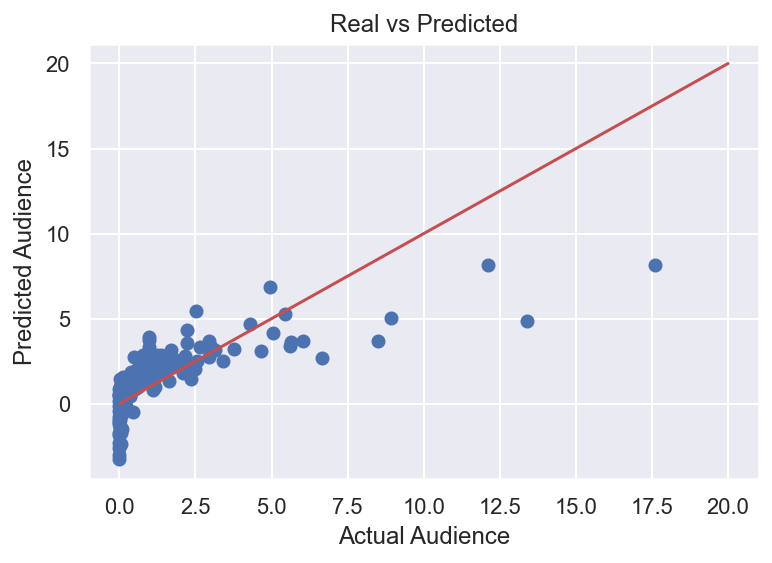

In [13]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 원핫인코딩

In [14]:
X_new = [np.array(X_train.loc[109])]
print(reg.predict(X_new))

[2.71212425]


In [13]:
# 아웃라이어 제거 3차
fraud = df_2['Audience']
quantile_25 = np.percentile(fraud.values, 25)
quantile_75 = np.percentile(fraud.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * 1.5
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
outlier_index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72],
           dtype='int64')

In [14]:
df_2.drop(index=outlier_index,axis=1, inplace=True)

In [16]:
df_2

,Screen,Audience,rate_12세이상관람가,rate_15세이상관람가,rate_18세관람가,rate_전체관람가,rate_청소년관람불가,genre_SF,genre_가족,genre_공연,...,month_8,month_9,month_10,month_11,month_12,CJEnM,LotteShop,Next,ShowBox,CJEnt
73,807,4.131248,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.0,0.0,0.0,1.0,0.0
74,593,4.110645,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
75,475,4.088799,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
76,534,4.057546,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0
77,418,4.044582,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,521,1.346274,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
807,536,0.465749,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0
808,552,1.823116,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1.0,0.0,0.0,0.0,0.0
809,567,1.865195,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0


RMSE of Train Data :  0.5856662253803587
RMSE of Test Data :  0.7559415729450163


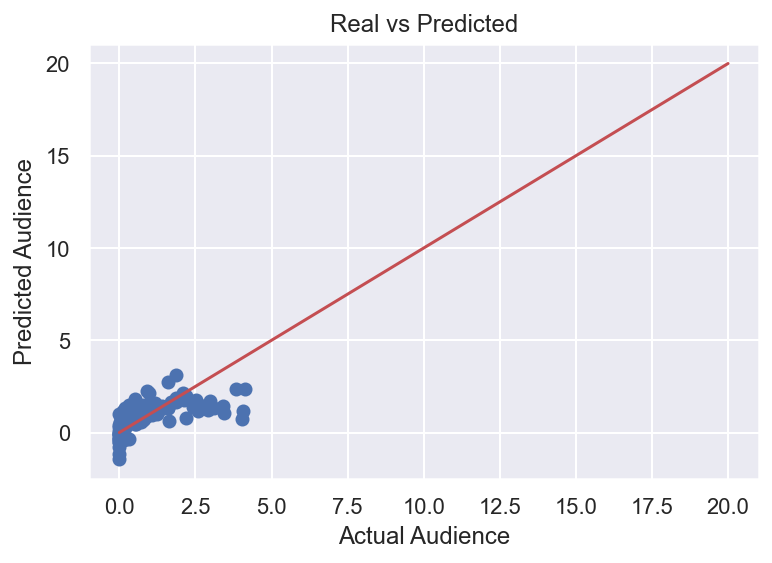

In [15]:
from sklearn.model_selection import train_test_split

X= df_2.drop(['Audience'], axis=1)
y = df_2['Audience']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)


from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)


plt.scatter(y_test, pred_test)
plt.xlabel("Actual Audience")
plt.ylabel("Predicted Audience")
plt.title("Real vs Predicted")
plt.plot([0,20],[0,20],'r')
plt.show()
# 아웃라이어 제거 3차